In [1]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.externals.six import StringIO
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier
from IPython.display import Image
from mpl_toolkits.mplot3d import Axes3D

## ***Loading Mammographic Masses Data***

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.data', names = ['BI_RADS','Age','Shape','Margin','Density','Severity'], na_values='?')
# df.dropna(axis=0, how='any', inplace=True)
df.head()

,BI_RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [3]:
df.describe()

,BI_RADS,Age,Shape,Margin,Density,Severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


## ***Data Cleaning***

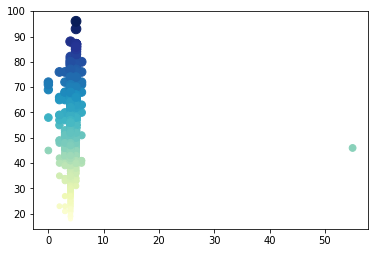

In [4]:
'''
plot the scatter of each variables and find the noise data.
'''
plt.scatter(df['BI_RADS'],df['Age'], s = df.Age, c = df.Age, cmap = 'YlGnBu')

In [5]:
'''
find the noisedata.
'''
df[df.BI_RADS > 10]

,BI_RADS,Age,Shape,Margin,Density,Severity
340,55.0,46.0,4.0,3.0,3.0,1


In [6]:
'''
Drop the noise data.
'''
df.drop(340,axis=0,inplace=True)

## ***Missing Value***

In [7]:
'''
summarize the number of missing value
'''
df.isna().sum()

BI_RADS      2
Age          5
Shape       31
Margin      48
Density     76
Severity     0
dtype: int64

Text(0.5, 1.0, 'Missing Value in mammographic masses Data')

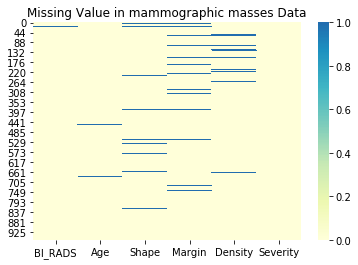

In [8]:
MV = seaborn.heatmap(df.isna(), cmap = 'YlGnBu', center=0.7)
plt.setp(MV.axes.get_xticklabels(), rotation = 0)
plt.title('Missing Value in mammographic masses Data')

In [9]:
'''
Fill in the missing value with mean value of each variable.
'''
df.BI_RADS.fillna(df.BI_RADS.mean(),inplace=True)
df.Age.fillna(df.Age.mean(),inplace=True)
df.Shape.fillna(df.Shape.mean(),inplace=True)
df.Margin.fillna(df.Margin.mean(),inplace=True)
df.Density.fillna(df.Density.mean(),inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960 entries, 0 to 960
Data columns (total 6 columns):
BI_RADS     960 non-null float64
Age         960 non-null float64
Shape       960 non-null float64
Margin      960 non-null float64
Density     960 non-null float64
Severity    960 non-null int64
dtypes: float64(5), int64(1)
memory usage: 52.5 KB


Text(0.5, 1.0, 'Correlation Matrix for mammographic masses Data')

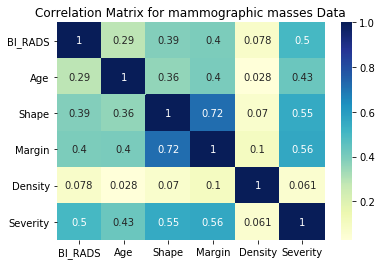

In [11]:
'''
print the Correlation Matrix for mammographic masses Data
'''
CM = seaborn.heatmap(df.corr(), annot = True, cmap = "YlGnBu")
plt.setp(CM.axes.get_xticklabels(), rotation = 0)
plt.title('Correlation Matrix for mammographic masses Data')

## ***Data Discription***

/Users/niceweather/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/niceweather/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


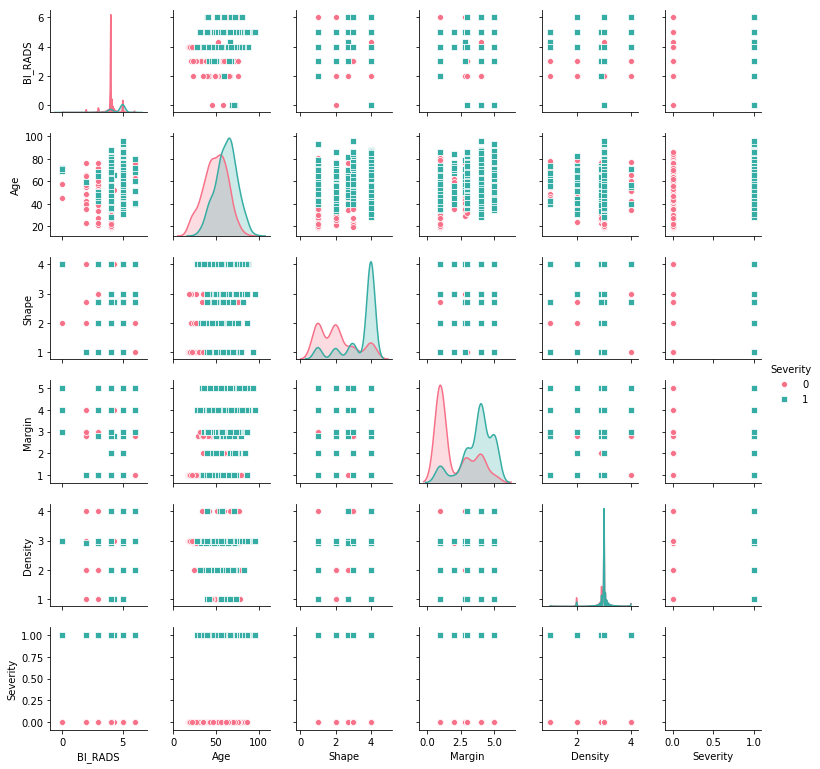

In [12]:
'''
plot the distribution between each of the variable with different lable.
'''
seaborn.pairplot(df, hue = "Severity", palette = "husl", markers = ["o", "s"], height = 1.8)

BI_RADS        AxesSubplot(0.125,0.657941;0.227941x0.222059)
Age         AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Shape       AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Margin         AxesSubplot(0.125,0.391471;0.227941x0.222059)
Density     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Severity    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
dtype: object

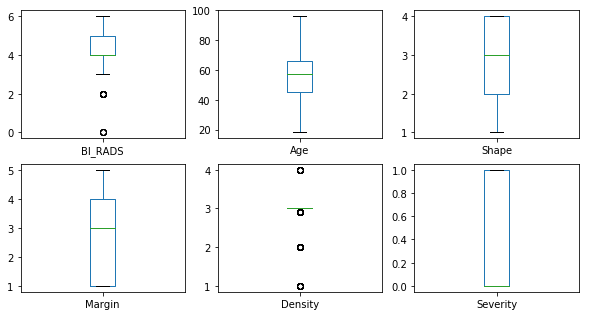

In [13]:
'''
plot the distribution of each variabel.
'''
df.plot(kind = 'box' , subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (10,8))

## ***Feature Pre-Processing***

In [14]:
'''
split the features and label.
Normalization the features.
'''
data_x, data_y = df, df.pop('Severity')
normal_data_x = pd.DataFrame(MinMaxScaler(feature_range = (0,1)).fit_transform(data_x), columns= ['BI_RADS','Age','Shape','Margin','Density'])

In [15]:
'''
fit the data and transform to identify the top 3 important feathers.
'''
feature_selection = SelectKBest(f_classif, k=3)
feature_selection.fit_transform(normal_data_x,data_y)

array([[0.83333333, 0.66666667, 1.        ],
       [0.66666667, 0.        , 0.        ],
       [0.83333333, 1.        , 1.        ],
       ...,
       [0.66666667, 1.        , 1.        ],
       [0.83333333, 1.        , 1.        ],
       [0.66666667, 0.66666667, 0.5       ]])

## ***Feature Selection***

In [16]:
'''
Identify the top 3 varaibles to including in the model.
'''
top_feature = pd.DataFrame(feature_selection.scores_, columns = ['F_Value'], index = normal_data_x.columns)
top_feature.sort_values('F_Value', ascending=False)

,F_Value
Margin,440.951616
Shape,423.854863
BI_RADS,326.291255
Age,219.623463
Density,3.614335


In [17]:
normal_data_x = normal_data_x[['Margin', 'Shape', 'BI_RADS']]
data_x = data_x[['Margin', 'Shape', 'BI_RADS']]
data_x.head()

,Margin,Shape,BI_RADS
0,5.0,3.0,5.0
1,1.0,1.0,4.0
2,5.0,4.0,5.0
3,1.0,1.0,4.0
4,5.0,1.0,5.0


/Users/niceweather/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


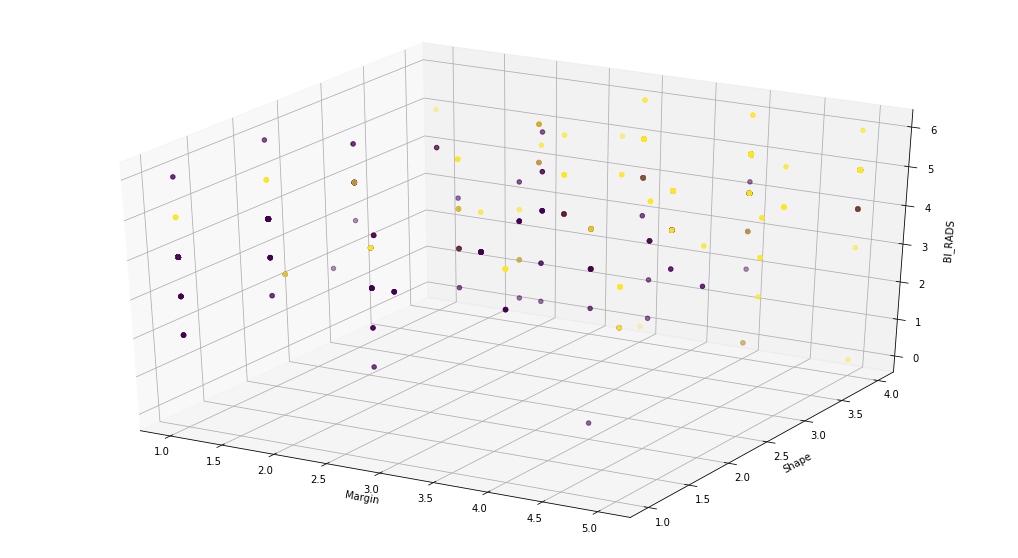

In [18]:
'''
Plot the variables in the feature vector.
'''
feature1 = df['Margin'].values
feature2 = df['Shape'].values 
feature3 = df['BI_RADS'].values

data_y[data_y=='0'] = 'blue' ## negative
data_y[data_y=='1'] = 'red' ## positive

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feature1, feature2, feature3, c = data_y)

ax.set_xlabel('Margin')
ax.set_ylabel('Shape')
ax.set_zlabel('BI_RADS')

plt.show()

## ***Split data***

In [19]:
'''
split the data into training and testing set. 20% data used for test.
'''
pre_train_x, test_x, pre_train_y, test_y = train_test_split(data_x, data_y, test_size = 0.20, random_state = 666)
print ('number of instances for training: ', len(pre_train_y))
print ('number of instances for test: ', len(test_y))
print('number of positive instances for training: ', pre_train_y.tolist().count(1))
print('number of negative instances for training: ', pre_train_y.tolist().count(0))

number of instances for training:  768
number of instances for test:  192
number of positive instances for training:  356
number of negative instances for training:  412


## ***Over Sampling***

In [20]:
'''
import the data for over-sampling.
'''
!pip install imblearn
from imblearn.over_sampling import RandomOverSampler

In [21]:
def loadtrainData_oversampling():
   '''
   This funtion is used to read the training data for over sampling.
   '''
   ros = RandomOverSampler(random_state = 666)
   sample_x, sample_y = ros.fit_sample(pre_train_x, pre_train_y)
   return sample_x, sample_y

In [22]:
'''
over-sampling the data
Identify the training data is balance.
'''
train_x, train_y = loadtrainData_oversampling()
train_x = pd.DataFrame(train_x)
train_x.columns = ['Margin','Shape', 'BI_RADS']
train_y = pd.DataFrame(train_y)
train_y.columns = ['Severity']
print('mean:', train_y.mean())
print('Number of Sample:', len(train_y))

mean: Severity    0.5
dtype: float64
Number of Sample: 824


## ***Decision Tree***

In [23]:
'''
Using grid search to identify the most efficeincy hyper-parameters.
'''
DecisionTree = tree.DecisionTreeClassifier()
param_grid = [{'max_depth': np.arange(1, 10),'criterion': ['gini']},{'max_depth': np.arange(1, 5),'criterion': ['entropy']}]

test_tree = GridSearchCV(DecisionTree, param_grid = param_grid, scoring='accuracy',cv=10, iid = True)

test_tree.fit(train_x, train_y)
print(test_tree.best_score_)
print(test_tree.best_params_)

0.8483009708737864
{'criterion': 'gini', 'max_depth': 6}


In [24]:
'''
K-fold cross-validation
'''
DecisionTree = tree.DecisionTreeClassifier(max_depth = 6, criterion='gini', random_state = 666)
scores = cross_validate(DecisionTree, train_x, train_y, cv = 10)
scores

/Users/niceweather/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.00374508, 0.00621319, 0.00423384, 0.00274491, 0.00299692,
        0.00276685, 0.00514793, 0.00343776, 0.00408196, 0.00280118]),
 'score_time': array([0.00119185, 0.00124788, 0.00104308, 0.00100398, 0.00104785,
        0.00122809, 0.00110102, 0.0014112 , 0.00122595, 0.00106597]),
 'test_score': array([0.82142857, 0.86904762, 0.8902439 , 0.87804878, 0.90243902,
        0.84146341, 0.75609756, 0.79268293, 0.84146341, 0.8902439 ]),
 'train_score': array([0.86621622, 0.86351351, 0.85579515, 0.86253369, 0.85714286,
        0.8638814 , 0.87466307, 0.86522911, 0.85983827, 0.85849057])}

In [25]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std()))

Accuracy: 0.85 (+/- 0.04)


In [26]:
'''
Testing the data with the best hyper-parameters.
'''
DecisionTree = tree.DecisionTreeClassifier(max_depth = 6, criterion='gini', random_state = 666)
DecisionTree.fit(train_x, train_y)
predict_y_DT = DecisionTree.predict(test_x)
fpr, tpr, thresholds = metrics.roc_curve(test_y,predict_y_DT, pos_label=1)
print('AUC:' + str(metrics.auc(fpr, tpr)), 'accuracy:' + str(metrics.accuracy_score(test_y,predict_y_DT)), 'precision:' + str(metrics.precision_score(test_y,predict_y_DT, average='binary')), 'recall:' + str(metrics.recall_score(test_y,predict_y_DT, average='binary')), 'f1:' + str(metrics.f1_score(test_y,predict_y_DT, average='binary')))

AUC:0.8234265734265733 accuracy:0.8229166666666666 precision:0.7934782608695652 recall:0.8295454545454546 f1:0.8111111111111111


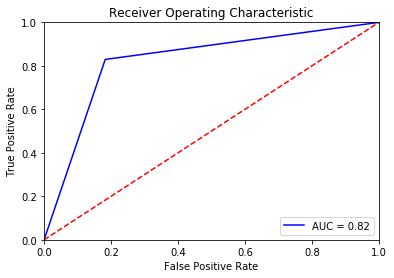

In [27]:
'''
plot the ROC curve.
'''
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % metrics.auc(fpr, tpr))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

    Confusion Matrix


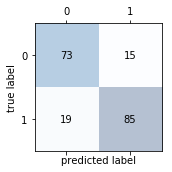

In [28]:
'''
plot the confusion matrix.
'''
print('    Confusion Matrix')
confmat = metrics.confusion_matrix(y_true = test_y, y_pred = predict_y_DT, labels=[1, 0])
fig, ax = plt.subplots(figsize = (2.5, 2.5))
ax.matshow(confmat, cmap = plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x = j, y = i, s = confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
plt.show()

In [29]:
'''
import pydotplus to plot the structure of decision tree.
'''
!pip install pydotplus
from pydotplus import graph_from_dot_data

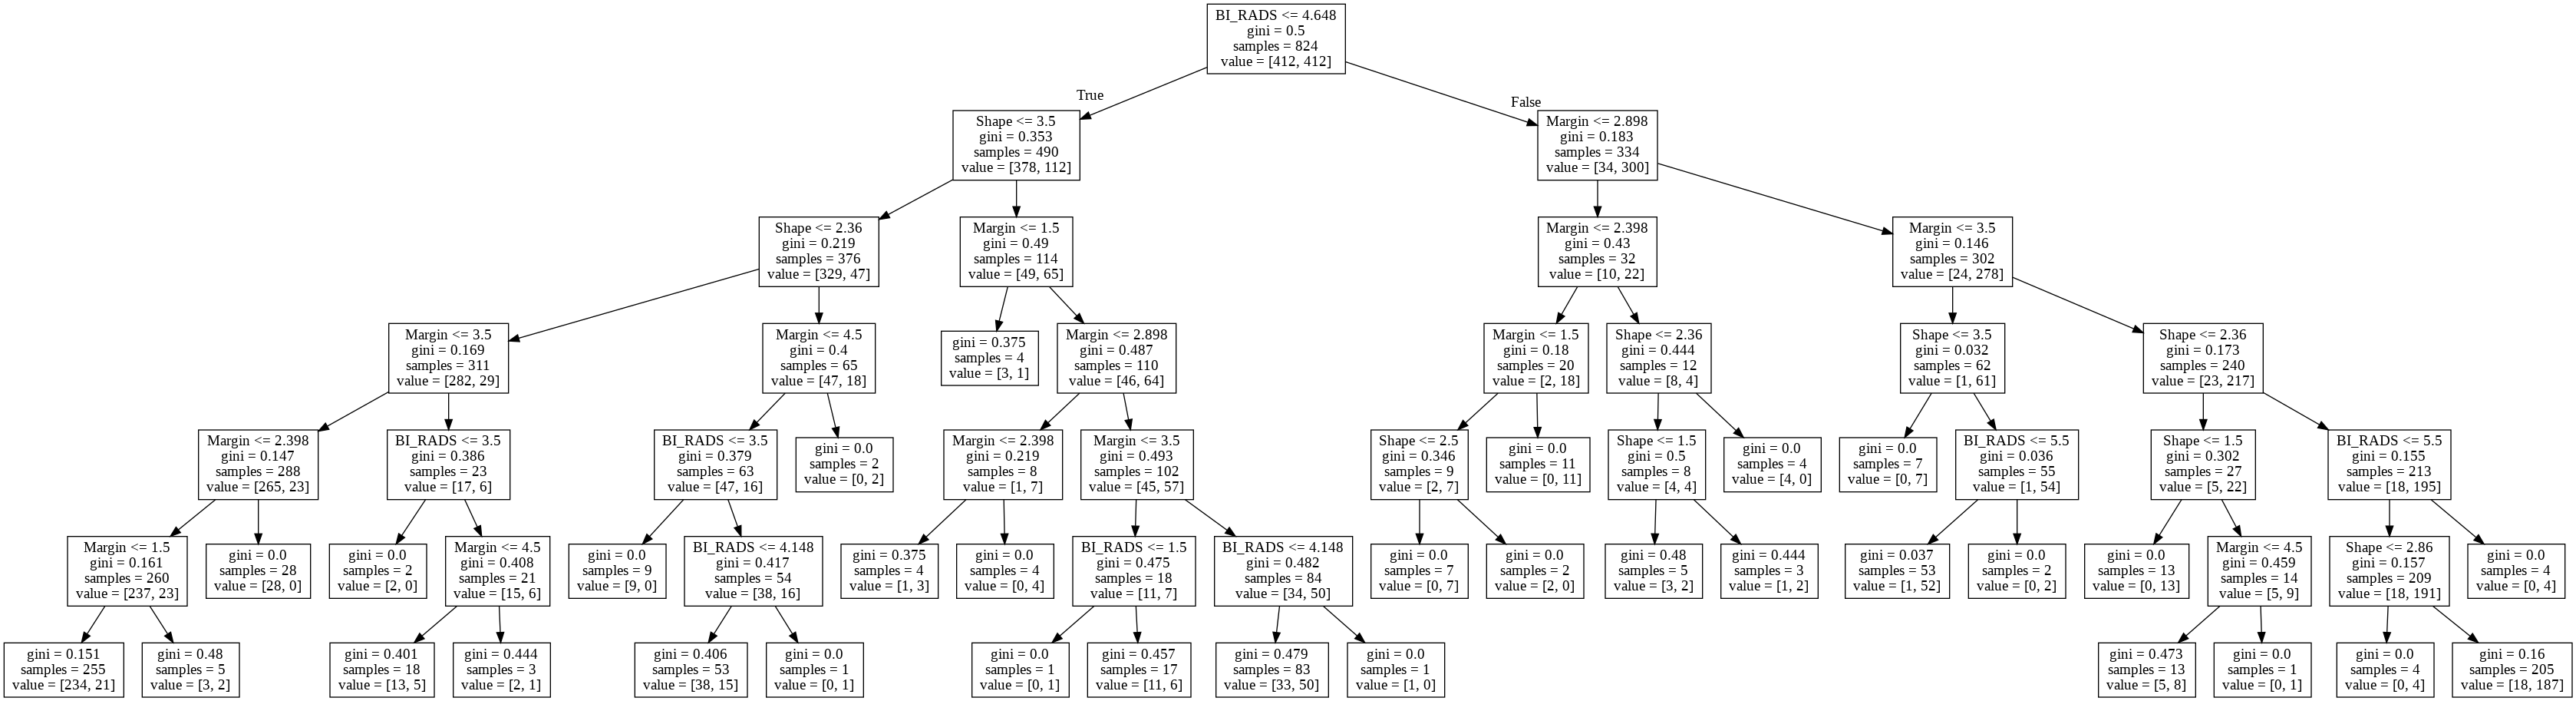

In [140]:
'''
plot the structure of decision tree.
The result is shown in CHFX2_Decision_Tree.png
'''
dot_data = StringIO()  
tree.export_graphviz(DecisionTree, out_file = dot_data, feature_names = ['Margin','Shape','BI_RADS'])  
graph = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## ***MLP-Neural Network-sklearn***

In [29]:
'''
Using grid search to identify the most efficeincy hyper-parameters.
'''
MLP = MLPClassifier()

param_grid = ({'solver': ['lbfgs'], 'max_iter': [1000, 4000, 16000], 'alpha': 10.0 ** -np.arange(1, 3), 'hidden_layer_sizes':[(8,8,8,8),(16,16,16,16), (2,4,8,4,2)], 'random_state': [666]}, {'solver': ['sgd'], 'max_iter': [4000, 16000], 'alpha': 10.0 ** -np.arange(1, 3), 'learning_rate_init': 10.0 ** -np.arange(0, 5), 'hidden_layer_sizes':[(8,8,8,8),(16,16,16,16),(2,4,8,4,2)], 'random_state': [666]}, {'solver': ['adam'], 'max_iter': [4000, 16000], 'alpha': 10.0 ** -np.arange(1, 3), 'learning_rate_init': 10.0 ** -np.arange(0, 5), 'hidden_layer_sizes':[(8,8,8,8),(16,16,16,16),(2,4,8,4,2)], 'random_state': [666]})  

test_MLP = GridSearchCV(MLP, param_grid = param_grid, scoring = 'accuracy', cv = 3, iid = True)
test_MLP.fit(train_x, train_y.values.ravel())

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=None,
       param_grid=({'solver': ['lbfgs'], 'max_iter': [1000, 4000, 16000], 'alpha': array([0.1 , 0.01]), 'hidden_layer_sizes': [(8, 8, 8, 8), (16, 16, 16, 16), (2, 4, 8, 4, 2)], 'random_state': [666]}, {'solver': ['sgd'], 'max_iter': [4000, 16000], 'alpha': array([0.1 , 0.01]), 'learning_rate_init': array([...]), 'hidden_layer_sizes': [(8, 8, 8, 8), (16, 16, 16, 16), (2, 4, 8, 4, 2)], 'random_state': [666]}),
       pre_dispa

In [30]:
print(test_MLP.best_score_)
print(test_MLP.best_params_)

0.8398058252427184
{'alpha': 0.01, 'hidden_layer_sizes': (8, 8, 8, 8), 'max_iter': 1000, 'random_state': 666, 'solver': 'lbfgs'}


In [31]:
'''
K-fold cross-validation
'''
MLP = MLPClassifier(solver='lbfgs', alpha = 0.01,
                    hidden_layer_sizes=(8,8,8,8), random_state = 666, max_iter = 1000)
MLP.fit(train_x, train_y.values.ravel())
scores_DNN = cross_validate(MLP, train_x, train_y.values.ravel(), cv = 10)
print(scores_DNN)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_DNN['test_score'].mean(), scores_DNN['test_score'].std()))

{'fit_time': array([0.52075005, 0.33921528, 1.2699759 , 0.47146487, 0.40340471,
       0.11264086, 0.84495616, 0.59486103, 0.287745  , 0.28183484]), 'score_time': array([0.00126791, 0.0020988 , 0.00129294, 0.00133109, 0.00136805,
       0.00139809, 0.00133491, 0.00166392, 0.00154066, 0.0019381 ]), 'test_score': array([0.82142857, 0.88095238, 0.86585366, 0.87804878, 0.85365854,
       0.80487805, 0.73170732, 0.81707317, 0.84146341, 0.87804878]), 'train_score': array([0.85      , 0.84459459, 0.84770889, 0.84770889, 0.83153639,
       0.84770889, 0.86792453, 0.8490566 , 0.85175202, 0.83153639])}
Accuracy: 0.84 (+/- 0.04)


In [32]:
predict_y_MLP = MLP.predict(test_x)
fpr, tpr, thresholds = metrics.roc_curve(test_y, predict_y_MLP, pos_label=1)
print('AUC:' + str(metrics.auc(fpr, tpr)), 'accuracy:' + str(metrics.accuracy_score(test_y,predict_y_MLP)), 'precision:' + str(metrics.precision_score(test_y,predict_y_MLP, average='binary')), 'recall:' + str(metrics.recall_score(test_y,predict_y_MLP, average='binary')), 'f1:' + str(metrics.f1_score(test_y,predict_y_MLP, average='binary')))

AUC:0.8330419580419581 accuracy:0.8333333333333334 precision:0.8111111111111111 recall:0.8295454545454546 f1:0.8202247191011237


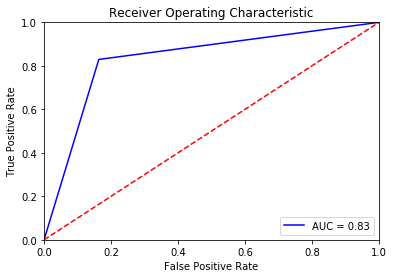

In [33]:
'''
plot the ROC curve.
'''
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % metrics.auc(fpr, tpr))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

    Confusion Matrix


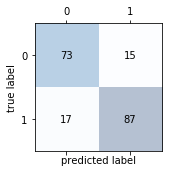

In [34]:
'''
plot the confusion matrix.
'''
print('    Confusion Matrix')
confmat = metrics.confusion_matrix(y_true = test_y, y_pred = predict_y_MLP, labels=[1, 0])
fig, ax = plt.subplots(figsize = (2.5, 2.5))
ax.matshow(confmat, cmap = plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x = j, y = i, s = confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
plt.show()

## ***DNN-tensorflow***

In [35]:
'''
import tensorflow for Neural Network.
'''
!pip install tensorflow
import tensorflow as tf

In [36]:
'''
PLEASE RESET THE PATH TO SAVE THE NEURAL NETWORK BEFORE ANY FURTHER OPERATION
'''
PATH = '/Users/niceweather/Desktop/CHFX2'

In [37]:
'''
Extracting the feature of data from train set.
'''
my_feature_columns = []
for key in train_x.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

[NumericColumn(key='Margin', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Shape', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='BI_RADS', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [38]:
def my_model_fn(features,labels,mode,params):
    '''
    The purpose of this function is to define my custom estimator.
    '''
    net = tf.feature_column.input_layer(features, params['feature_columns']) ## define the input layer by the feature columns.
    
    for units in params['hidden_units']:
        net = tf.layers.dense(net, units=units, activation=tf.nn.relu) ## define the hidden layer by the number of hidden layer and the number of neurons in each layer
    
    logits = tf.layers.dense(net, params['n_classes'], activation=None) ## define the output layer by the classify number.
    
    ## define the prediction part
    predicted_classes = tf.argmax(logits, 1) ## The maximum result is the prediction result.
    if mode == tf.estimator.ModeKeys.PREDICT:
        predictions = {
            'class_ids': predicted_classes[:, tf.newaxis], ## change it to the list [[a],[b]]
            'probabilities': tf.nn.softmax(logits), ## normalization
            'logits': logits,
        }
        return tf.estimator.EstimatorSpec(mode, predictions=predictions)
      
    ## define the loss function.
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)
    
    ## define the training process.
    if mode == tf.estimator.ModeKeys.TRAIN:
        # optimizer = tf.train.AdagradOptimizer(learning_rate=0.001) # optimize the loss function to reduce the loss and improve the accuracy.
        optimizer = tf.train.AdamOptimizer(learning_rate = 0.01)
        # optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
        # optimizer = tf.train.MomentumOptimizer(learning_rate = 0.001)
        # optimizer = tf.train.RMSPropOptimizer(learning_rate = 0.001)
        train_op = optimizer.minimize(loss, global_step=tf.train.get_global_step())  # optimization
        return tf.estimator.EstimatorSpec(mode, loss=loss, train_op=train_op)
      
    ## define the evaluation process.
    accuracy = tf.metrics.accuracy(labels = labels,
                                   predictions = predicted_classes)
    auc = tf.metrics.auc(labels = labels,
                         predictions = predicted_classes)
    precision = tf.metrics.precision(labels =labels,
                                     predictions = predicted_classes)
    recall = tf.metrics.recall(labels =labels,
                               predictions = predicted_classes)
    f1 = tf.contrib.metrics.f1_score(labels = labels,
                                     predictions = predicted_classes)
    metrics = {'accuracy': accuracy, 'AUC': auc, 'precision': precision, 'recall': recall, 'f1':f1}
    if mode == tf.estimator.ModeKeys.EVAL:
        return tf.estimator.EstimatorSpec(mode, loss=loss, eval_metric_ops=metrics) 

In [39]:
'''
Define the model, including the model, hidden layer and the number of classification
'''
classifier = tf.estimator.Estimator(
        model_fn = my_model_fn,
        model_dir = PATH,
        params = {
            'feature_columns': my_feature_columns,
            'hidden_units': [8, 8, 8, 8],
            'n_classes': 2,
        })

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/Users/niceweather/Desktop/CHFX2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a2e1af518>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [40]:
'''
The number of training examples utilized in one iteration is 128 and randomly adjust the data order in each iteration.
'''
batch_size = 128
def train_input_fn(features, labels, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
    dataset = dataset.shuffle(buffer_size = 100, seed = 666).repeat().batch(batch_size) # randomly adjust the data order
    return dataset.make_one_shot_iterator().get_next()

In [41]:
'''
Begin training and the step is 15000.
'''
classifier.train(
    input_fn=lambda:train_input_fn(train_x, train_y, batch_size),
    steps = 15000)

Instructions for updating:
Colocations handled automatically by placer.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
Use keras.layers.dense instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /Users/niceweather/Desktop/CHFX2/model.ckpt.
INFO:tensorflow:loss = 1.0779672, step = 1
INFO:tensorflow:global_step/sec: 403.366
INFO:tensorflow:loss = 0.4892119, ste

INFO:tensorflow:loss = 0.5058427, step = 5901 (0.186 sec)
INFO:tensorflow:global_step/sec: 487.791
INFO:tensorflow:loss = 0.3888514, step = 6001 (0.205 sec)
INFO:tensorflow:global_step/sec: 292.286
INFO:tensorflow:loss = 0.39673543, step = 6101 (0.343 sec)
INFO:tensorflow:global_step/sec: 466.192
INFO:tensorflow:loss = 0.28496087, step = 6201 (0.213 sec)
INFO:tensorflow:global_step/sec: 560.271
INFO:tensorflow:loss = 0.35525328, step = 6301 (0.178 sec)
INFO:tensorflow:global_step/sec: 389.551
INFO:tensorflow:loss = 0.33366394, step = 6401 (0.257 sec)
INFO:tensorflow:global_step/sec: 369.233
INFO:tensorflow:loss = 0.31735396, step = 6501 (0.273 sec)
INFO:tensorflow:global_step/sec: 451.137
INFO:tensorflow:loss = 0.2822233, step = 6601 (0.219 sec)
INFO:tensorflow:global_step/sec: 564.685
INFO:tensorflow:loss = 0.27560693, step = 6701 (0.177 sec)
INFO:tensorflow:global_step/sec: 472.007
INFO:tensorflow:loss = 0.33584583, step = 6801 (0.212 sec)
INFO:tensorflow:global_step/sec: 576.21
INFO

INFO:tensorflow:loss = 0.2677735, step = 14101 (0.179 sec)
INFO:tensorflow:global_step/sec: 550.198
INFO:tensorflow:loss = 0.32757252, step = 14201 (0.182 sec)
INFO:tensorflow:global_step/sec: 535.96
INFO:tensorflow:loss = 0.34639943, step = 14301 (0.186 sec)
INFO:tensorflow:global_step/sec: 572.491
INFO:tensorflow:loss = 0.30967492, step = 14401 (0.175 sec)
INFO:tensorflow:global_step/sec: 530.687
INFO:tensorflow:loss = 0.38031533, step = 14501 (0.189 sec)
INFO:tensorflow:global_step/sec: 469.925
INFO:tensorflow:loss = 0.35097963, step = 14601 (0.214 sec)
INFO:tensorflow:global_step/sec: 408.59
INFO:tensorflow:loss = 0.40550137, step = 14701 (0.245 sec)
INFO:tensorflow:global_step/sec: 430.278
INFO:tensorflow:loss = 0.29436135, step = 14801 (0.232 sec)
INFO:tensorflow:global_step/sec: 513.01
INFO:tensorflow:loss = 0.41757652, step = 14901 (0.198 sec)
INFO:tensorflow:Saving checkpoints for 15000 into /Users/niceweather/Desktop/CHFX2/model.ckpt.
INFO:tensorflow:Loss for final step: 0.31

In [42]:
'''
Define the testing process.
'''
def eval_input_fn(features, labels, batch_size):
    features=dict(features)
    inputs=(features,labels)
    dataset = tf.data.Dataset.from_tensor_slices(inputs)
    dataset = dataset.batch(batch_size)
    return dataset.make_one_shot_iterator().get_next()

In [43]:
'''
Evaluate our model.
'''
eval_result = classifier.evaluate(
    input_fn=lambda:eval_input_fn(test_x, test_y, batch_size))
print(eval_result)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-11T02:26:56Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /Users/niceweather/Desktop/CHFX2/model.ckpt-15000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-05-11-02:26:57
INFO:tensorflow:Saving dict for global step 15000: AUC = 0.8168707, accuracy = 0.8177083, f1 = 0.8022598, global_step = 15000, loss = 0.612677, precision = 0.7977528, recall = 0.8068182
INFO:tens